In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('dataset.csv')
X = df.drop(columns=['Activity'])
X = StandardScaler().fit_transform(X.copy())
y = df['Activity']

X, y = SMOTE(n_jobs=-1, random_state=42).fit_sample(X, y)

# balanced_accuracy = (recall + specificity) / 2
# roc_auc_ovr = ROC AUC OneVsRest (sensitive to class imbalance)
# roc_auc_ovo = ROC AUC OneVsOne (insensitive to class imbalance)
metrics = ['f1_weighted', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'accuracy']

## Distribuição de classes

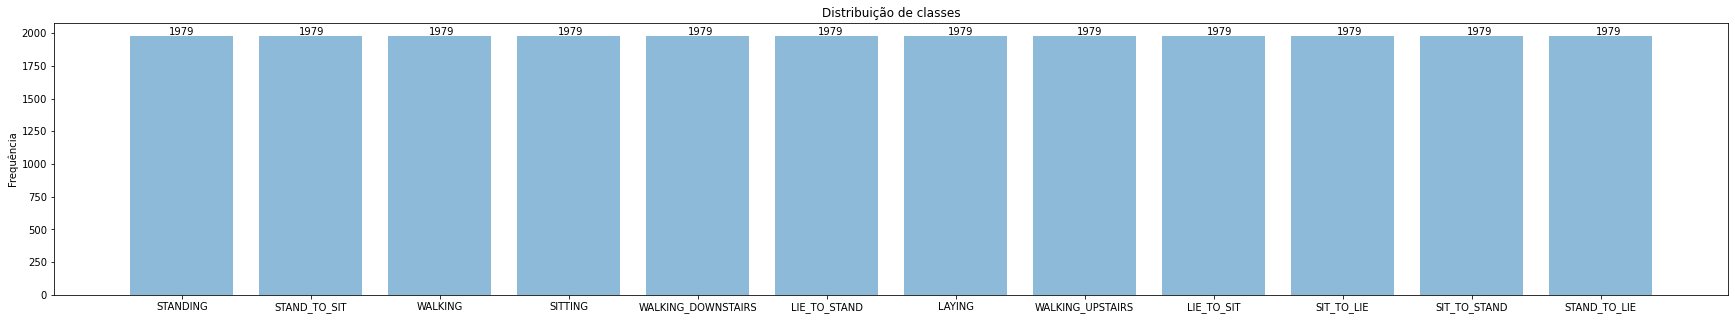

In [11]:
counts = y.value_counts()
bar_y = counts.index.to_list()
bar_x = counts.tolist()
y_pos = np.arange(len(bar_y))

plt.subplots(figsize=(30,5))
plt.bar(y_pos, bar_x, align='center', alpha = 0.5)
plt.xticks(y_pos, bar_y)
xlocs, xlabs = plt.xticks()
plt.ylabel('Frequência')
plt.title('Distribuição de classes')
for i, v in enumerate(bar_x):
    plt.text(xlocs[i] - 0.1 + i*0.006, v + 5, str(v))

## Scatter plot

In [12]:
# Pre-Process data

tsne_data = X.copy()
label = y.copy()

# Scale data so it has mean = 0, std = 1
scl = StandardScaler()
# and scale every entry to [0,1] range
tsne_data = scl.fit_transform(tsne_data)
# so that the sparse data is centered

# Reduce dimensions (speed up)
# uses SVD (Singular Value Decomposition)
# to linear dimensionality reduction (projection)
# requires not sparsed data
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
# t-distributed stochastic neighbor embedding
# nonlinear dimensionality reduction to high dim data
# for visulation on low dim spaces
tsne = TSNE(random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(tsne_data)

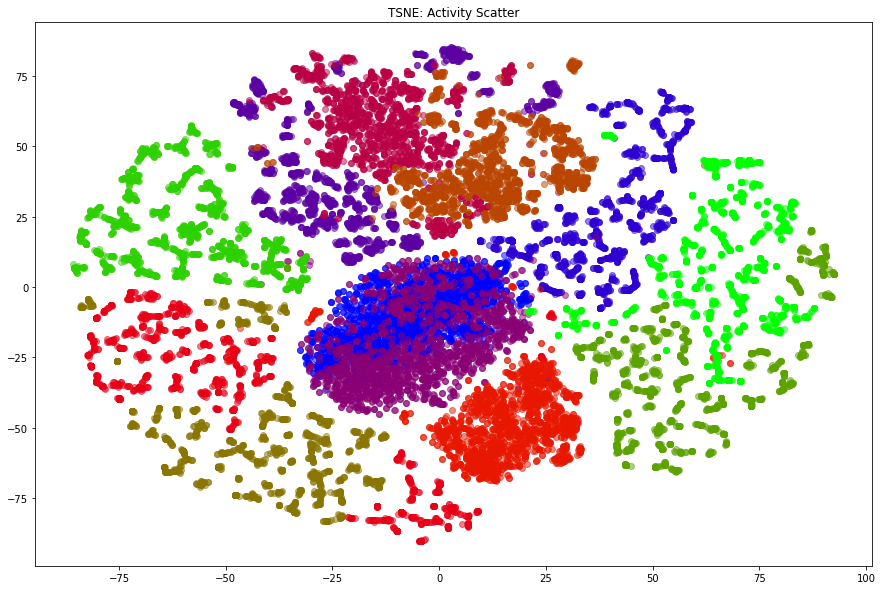

In [13]:
## Plot Activities

# Create subplots
plt.subplots(figsize=(15,10))

# Get colors
n = label.unique().shape[0]
colormap = get_cmap('brg')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label.value_counts().index):
    # Mask to separate sets
    mask = (label==group).values
    # ax[0]
    plt.scatter(
        x=tsne_transformed[mask][:,0],
        y=tsne_transformed[mask][:,1],
        c=colors[i],
        alpha=0.5,
        label=group
    )
plt.title('TSNE: Activity Scatter')
plt.show()

## KNN

In [3]:
knn_results = []

# KNN classifiers with odd K in range of (1,19)
# search for best K
for i in range(10):
    k = i*2+1
    knnClass = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    result = cross_validate(knnClass, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    knn_results.append(result)
    print("k = " + str(k) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# spoiler it's: 7 for F1

k = 1:
	f1:
		mean = 96.60%;
		std = 0.01;
	ROC AUC OneVsRest:
		mean = 98.15%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 98.15%;
		std = 0.00;
	balanced accuracy:
		mean = 96.61%;
		std = 0.01;
	accuracy:
		mean = 96.61%;
		std = 0.01;
k = 3:
	f1:
		mean = 96.77%;
		std = 0.01;
	ROC AUC OneVsRest:
		mean = 99.41%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.41%;
		std = 0.00;
	balanced accuracy:
		mean = 96.78%;
		std = 0.01;
	accuracy:
		mean = 96.78%;
		std = 0.01;
k = 5:
	f1:
		mean = 96.93%;
		std = 0.01;
	ROC AUC OneVsRest:
		mean = 99.65%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.65%;
		std = 0.00;
	balanced accuracy:
		mean = 96.94%;
		std = 0.01;
	accuracy:
		mean = 96.93%;
		std = 0.01;
k = 7:
	f1:
		mean = 96.97%;
		std = 0.01;
	ROC AUC OneVsRest:
		mean = 99.72%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 99.72%;
		std = 0.00;
	balanced accuracy:
		mean = 96.98%;
		std = 0.01;
	accuracy:
		mean = 96.98%;
		std = 0.01;
k = 9:
	f1:
		mean = 96.91%;
		std = 0.01;
	ROC AUC 

## KNN report

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       593
        LIE_TO_SIT       1.00      1.00      1.00       594
      LIE_TO_STAND       1.00      1.00      1.00       594
           SITTING       0.88      0.93      0.90       594
        SIT_TO_LIE       1.00      1.00      1.00       594
      SIT_TO_STAND       1.00      1.00      1.00       594
          STANDING       0.94      0.87      0.90       594
      STAND_TO_LIE       0.99      1.00      1.00       594
      STAND_TO_SIT       0.99      1.00      0.99       594
           WALKING       0.98      0.99      0.99       593
WALKING_DOWNSTAIRS       0.99      0.99      0.99       593
  WALKING_UPSTAIRS       0.99      0.99      0.99       594

          accuracy                           0.98      7125
         macro avg       0.98      0.98      0.98      7125
      weighted avg       0.98      0.98      0.98      7125



## Decision Tree

In [5]:
tree_results = []

# Search for the best tree depth
for i in range(1, 17):
    curr = DecisionTreeClassifier(random_state=42, max_depth=i)
    result = cross_validate(curr, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    tree_results.append(result)
    print("Depth = " + str(i) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tROC AUC OneVsRest:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovr_weighted').mean()*100,
                std = result.get('test_roc_auc_ovr_weighted').std()))

    print("\tROC AUC OneVsOne:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_roc_auc_ovo_weighted').mean()*100,
                std = result.get('test_roc_auc_ovo_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# spoiler it's

Depth = 1:
	f1:
		mean = 5.82%;
		std = 0.00;
	ROC AUC OneVsRest:
		mean = 69.94%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 69.94%;
		std = 0.00;
	balanced accuracy:
		mean = 16.58%;
		std = 0.00;
	accuracy:
		mean = 16.56%;
		std = 0.00;
Depth = 2:
	f1:
		mean = 21.33%;
		std = 0.00;
	ROC AUC OneVsRest:
		mean = 81.71%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 81.71%;
		std = 0.00;
	balanced accuracy:
		mean = 32.81%;
		std = 0.00;
	accuracy:
		mean = 32.80%;
		std = 0.00;
Depth = 3:
	f1:
		mean = 40.61%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 91.57%;
		std = 0.00;
	ROC AUC OneVsOne:
		mean = 91.57%;
		std = 0.00;
	balanced accuracy:
		mean = 49.55%;
		std = 0.02;
	accuracy:
		mean = 49.55%;
		std = 0.02;
Depth = 4:
	f1:
		mean = 57.88%;
		std = 0.02;
	ROC AUC OneVsRest:
		mean = 95.10%;
		std = 0.01;
	ROC AUC OneVsOne:
		mean = 95.10%;
		std = 0.01;
	balanced accuracy:
		mean = 64.80%;
		std = 0.02;
	accuracy:
		mean = 64.81%;
		std = 0.02;
Depth = 5:
	f1:
		mean = 75.55%;
		st

## Decision Tree Report

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
dtree = DecisionTreeClassifier(random_state=42, max_depth=15)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       593
        LIE_TO_SIT       0.97      0.96      0.97       594
      LIE_TO_STAND       0.96      0.97      0.97       594
           SITTING       0.92      0.90      0.91       594
        SIT_TO_LIE       0.95      0.99      0.97       594
      SIT_TO_STAND       1.00      1.00      1.00       594
          STANDING       0.92      0.92      0.92       594
      STAND_TO_LIE       0.98      0.95      0.96       594
      STAND_TO_SIT       1.00      0.99      1.00       594
           WALKING       0.95      0.94      0.95       593
WALKING_DOWNSTAIRS       0.95      0.94      0.95       593
  WALKING_UPSTAIRS       0.92      0.94      0.93       594

          accuracy                           0.96      7125
         macro avg       0.96      0.96      0.96      7125
      weighted avg       0.96      0.96      0.96      7125



## Teste de oversampling da maneira correta

In [2]:
df = pd.read_csv('dataset.csv')
X = df.drop(columns=['Activity'])
X = StandardScaler().fit_transform(X.copy())
y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
X_train, y_train = SMOTE(n_jobs=-1, random_state=42).fit_sample(X_train, y_train)

dtree = DecisionTreeClassifier(random_state=42, max_depth=15)

dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)



                    precision    recall  f1-score   support

            LAYING       0.98      0.99      0.99       587
        LIE_TO_SIT       0.65      0.58      0.61        26
      LIE_TO_STAND       0.56      0.56      0.56        25
           SITTING       0.89      0.87      0.88       540
        SIT_TO_LIE       0.61      0.69      0.65        32
      SIT_TO_STAND       0.47      0.70      0.56        10
          STANDING       0.91      0.91      0.91       594
      STAND_TO_LIE       0.56      0.55      0.55        42
      STAND_TO_SIT       0.71      0.57      0.63        21
           WALKING       0.96      0.93      0.94       517
WALKING_DOWNSTAIRS       0.92      0.93      0.92       422
  WALKING_UPSTAIRS       0.89      0.92      0.90       463

          accuracy                           0.91      3279
         macro avg       0.76      0.77      0.76      3279
      weighted avg       0.91      0.91      0.91      3279

